In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [6,5]

### Part 1. Simulate a single 1D random walk until absorption

Random walk took 8302 steps


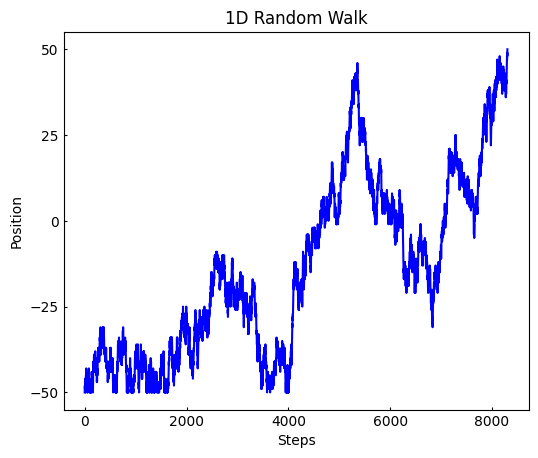

In [2]:
#defining the starting position
t = 0
t_list = [t]
x = -50 
positions = [x]
prob = 0.5  #equal probability 
 
#loops through random numbers until the position reaches 50
#moves up if at -50, down if random number is less than 0.5, and up if more than 0.5 and keeps track of steps
while x < 50:
    rng = np.random.random()
    if x == -50:
        x = -49
    elif rng < prob:
        x -= 1
    else:
        x += 1
    positions.append(x)
    t += 1
    t_list.append(t)
    
print('Random walk took',t,'steps')
 
#plotting random walk
plt.tick_params(which='major', direction='in', length=2)
plt.title('1D Random Walk')
plt.ylabel('Position')
plt.xlabel('Steps')
plt.yticks([-50,-25,0,25,50])
plt.plot(t_list,positions,'b')
plt.show()

### Part 2. Simulate a single 2d random walk until absorption

2D Random walk took 57692 steps


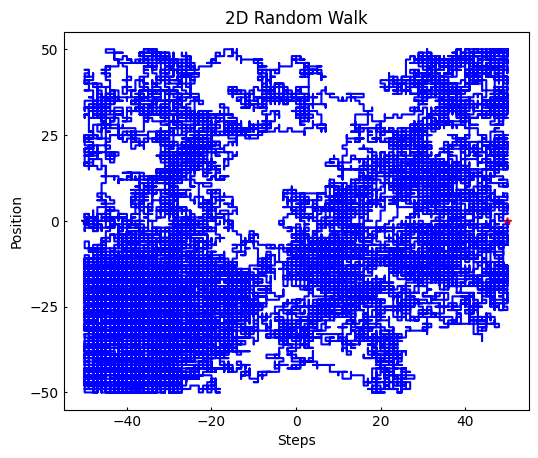

In [3]:
#defining initial conditions
t = 0
t_list = [t]
x = -50
y = 0
positions = [[x],[y]]
deltas = ((-1, 0),(1, 0),(0, -1),(0, 1)) #each direction the particel can move

#define the ways in which the particle can move at each part on the grid
#since it is much more time consuming for 2D, we pre-choose a random direction using np.choice with 
#the given probabilites which we then assign later if the condition is met
top_left = np.random.choice([1,2], size=1000000).tolist()
bot_left = np.random.choice([1,3], size=1000000).tolist()
edge_left = np.random.choice([1,2,3], p=[0.5,0.25,0.25], size=1000000).tolist()
top_right = np.random.choice([0,2], size=1000000).tolist()
bot_right = np.random.choice([0,3], size=1000000).tolist()
edge_right = np.random.choice([0,2,3], p=[0.5,0.25,0.25], size=1000000).tolist()
edge_bot = np.random.choice([0,1,3], p=[0.25,0.25,0.5], size=1000000).tolist()
edge_top = np.random.choice([0,1,2], p=[0.25,0.25,0.5], size=1000000).tolist()
free = np.random.choice([0,1,2,3], size=1000000).tolist()

#loop that moves the particle until it is at the specified point of (50,0)
#if a condition is met, we use the pre-chosen value from above and tell the particle to move that way and add a time step
while (x, y) != (50, 0):
    if x == -50:
        if y == -50:
            di = bot_left.pop()
        elif y == 50:
            di = top_left.pop()
        else:
            di = edge_left.pop()
    elif x == 50:
        if y == -50:
            di = bot_right.pop()
        elif y == 50:
            di = top_right.pop()
        else:
            di = edge_right.pop()
    elif y == -50:
        di = edge_bot.pop()
    elif y == 50:
        di = edge_top.pop()
    else:
        di = free.pop()
    
    dx, dy = deltas[di]
    x += dx
    y += dy
    t += 1
    
    positions[0].append(x)
    positions[1].append(y)
    t_list.append(t)

print('2D Random walk took',t,'steps')

#plotting the walk
plt.tick_params(which='major', direction='in', length=2)
plt.title('2D Random Walk')
plt.ylabel('Position')
plt.xlabel('Steps')
plt.ylim(-55,55)
plt.yticks([-50,-25,0,25,50])
plt.plot(-50,0,'*',c='black')
plt.plot(50,0,'*',c='red')
plt.plot(positions[0],positions[1],'b')
plt.show()

### Part 3. Simulate many random walks and get some statistics

In [4]:
#walk code same as part 2 except we run it 100 times and keep track of each run's total time
abs_time = []

for i in range(100):
    t = 0
    t_list = [t]
    x = -50
    y = 0
    positions = [[x],[y]]
    deltas = ((-1, 0),(1, 0),(0, -1),(0, 1))

    top_left = np.random.choice([1,2], size=1000000).tolist()
    bot_left = np.random.choice([1,3], size=1000000).tolist()
    edge_left = np.random.choice([1,2,3], p=[0.5,0.25,0.25], size=1000000).tolist()
    top_right = np.random.choice([0,2], size=1000000).tolist()
    bot_right = np.random.choice([0,3], size=1000000).tolist()
    edge_right = np.random.choice([0,2,3], p=[0.5,0.25,0.25], size=1000000).tolist()
    edge_bot = np.random.choice([0,1,3], p=[0.25,0.25,0.5], size=1000000).tolist()
    edge_top = np.random.choice([0,1,2], p=[0.25,0.25,0.5], size=1000000).tolist()
    free = np.random.choice([0,1,2,3], size=1000000).tolist()

    while (x, y) != (50, 0):
        if x == -50:
            if y == -50:
                di = bot_left.pop()
            elif y == 50:
                di = top_left.pop()
            else:
                di = edge_left.pop()
        elif x == 50:
            if y == -50:
                di = bot_right.pop()
            elif y == 50:
                di = top_right.pop()
            else:
                di = edge_right.pop()
        elif y == -50:
            di = edge_bot.pop()
        elif y == 50:
            di = edge_top.pop()
        else:
            di = free.pop()

        dx, dy = deltas[di]
        x += dx
        y += dy
        t += 1

        positions[0].append(x)
        positions[1].append(y)
        t_list.append(t)

    abs_time.append(t)

avg_res_time = np.average(abs_time)
res_time_stdev = np.std(abs_time)

print(f'Average residence time: {round(avg_res_time,3)}')
print(f'Residence time standard deviation: {round(res_time_stdev,3)}')

Average residence time: 74385.14
Residence time standard deviation: 71214.545


Average residence time: 80028.694
Residence time standard deviation: 73519.881


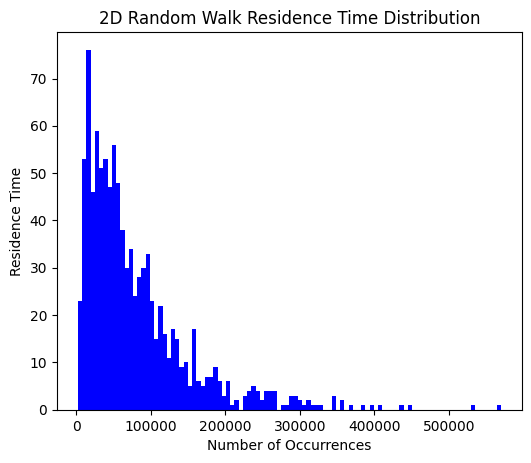

In [5]:
#walk code same as part 2 except we run it 1000 times and keep track of each run's total time
abs_time = []

for i in range(1000):
    t = 0
    t_list = [t]
    x = -50
    y = 0
    positions = [[x],[y]]
    deltas = ((-1, 0),(1, 0),(0, -1),(0, 1))

    top_left = np.random.choice([1,2], size=1000000).tolist()
    bot_left = np.random.choice([1,3], size=1000000).tolist()
    edge_left = np.random.choice([1,2,3], p=[0.5,0.25,0.25], size=1000000).tolist()
    top_right = np.random.choice([0,2], size=1000000).tolist()
    bot_right = np.random.choice([0,3], size=1000000).tolist()
    edge_right = np.random.choice([0,2,3], p=[0.5,0.25,0.25], size=1000000).tolist()
    edge_bot = np.random.choice([0,1,3], p=[0.25,0.25,0.5], size=1000000).tolist()
    edge_top = np.random.choice([0,1,2], p=[0.25,0.25,0.5], size=1000000).tolist()
    free = np.random.choice([0,1,2,3], size=1000000).tolist()

    while (x, y) != (50, 0):
        if x == -50:
            if y == -50:
                di = bot_left.pop()
            elif y == 50:
                di = top_left.pop()
            else:
                di = edge_left.pop()
        elif x == 50:
            if y == -50:
                di = bot_right.pop()
            elif y == 50:
                di = top_right.pop()
            else:
                di = edge_right.pop()
        elif y == -50:
            di = edge_bot.pop()
        elif y == 50:
            di = edge_top.pop()
        else:
            di = free.pop()

        dx, dy = deltas[di]
        x += dx
        y += dy
        t += 1

        positions[0].append(x)
        positions[1].append(y)
        t_list.append(t)

    abs_time.append(t)

avg_res_time = np.average(abs_time)
res_time_stdev = np.std(abs_time)

print(f'Average residence time: {round(avg_res_time,3)}')
print(f'Residence time standard deviation: {round(res_time_stdev,3)}')

plt.ylabel('Residence Time')
plt.xlabel('Number of Occurrences')
plt.title('2D Random Walk Residence Time Distribution')
plt.hist(abs_time,100,color='b')
plt.show()

Average residence time: 25037.01
Residence time standard deviation: 25037.01


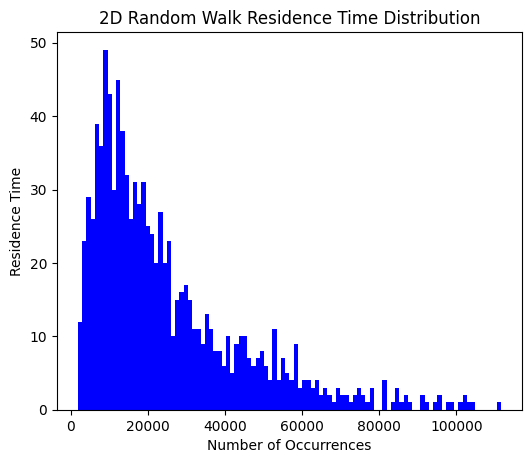

In [6]:
#walk code same as part 2 except we run it 1000 times and keep track of each run's total time and add the extra condition defined in part J
abs_time = []

for i in range(1000):
    t = 0
    t_list = [t]
    x = -50
    y = 0
    positions = [[x],[y]]
    deltas = ((-1, 0),(1, 0),(0, -1),(0, 1))

    top_left = np.random.choice([1,2], size=1000000).tolist()
    bot_left = np.random.choice([1,3], size=1000000).tolist()
    edge_left = np.random.choice([1,2,3], p=[0.5,0.25,0.25], size=1000000).tolist()
    top_right = np.random.choice([0,2], size=1000000).tolist()
    bot_right = np.random.choice([0,3], size=1000000).tolist()
    edge_right = np.random.choice([0,2,3], p=[0.5,0.25,0.25], size=1000000).tolist()
    edge_bot = np.random.choice([0,1,3], p=[0.25,0.25,0.5], size=1000000).tolist()
    edge_top = np.random.choice([0,1,2], p=[0.25,0.25,0.5], size=1000000).tolist()
    free = np.random.choice([0,1,2,3], size=1000000).tolist()

    while not(x == 50 and -25 <= y <= 25):
        if x == -50:
            if y == -50:
                di = bot_left.pop()
            elif y == 50:
                di = top_left.pop()
            else:
                di = edge_left.pop()
        elif x == 50:
            if y == -50:
                di = bot_right.pop()
            elif y == 50:
                di = top_right.pop()
            else:
                di = edge_right.pop()
        elif y == -50:
            di = edge_bot.pop()
        elif y == 50:
            di = edge_top.pop()
        else:
            di = free.pop()

        dx, dy = deltas[di]
        x += dx
        y += dy
        t += 1

        positions[0].append(x)
        positions[1].append(y)
        t_list.append(t)

    abs_time.append(t)
    
avg_res_time = np.average(abs_time)
res_time_stdev = np.std(abs_time)

print(f'Average residence time: {round(avg_res_time,3)}')
print(f'Residence time standard deviation: {round(avg_res_time,3)}')

plt.ylabel('Residence Time')
plt.xlabel('Number of Occurrences')
plt.title('2D Random Walk Residence Time Distribution')
plt.hist(abs_time,100,color='b')
plt.show()

For part H: While the average residance time changes slightly between the 100 and 1000 runs, the numbers are quite close, so since it would be extremely time consuming to run many more tests, we can assume that the numbers are relatively the same.

For part J: The average residence time naturally decreases as the absorption window is larger. With a decrease in residence time the distribution should shift to the lower end (left) which is corroborated by the histograms.